In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,precision_score, recall_score, accuracy_score,f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score,mean_squared_error,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [ ]:
#df_ph_m =loadmat("/content/gdrive/MyDrive/sample_phase_unsort_mod2.mat")
#array_ph_m=df_ph_m['sample_phase']
#df_ph_c =loadmat("/content/gdrive/MyDrive/sample_phase.mat")
#array_ph_c=df_ph_c['sample_phase']
#df =loadmat("/content/gdrive/MyDrive/sample.mat")
#array=df['sample']


df_ph =loadmat("/content/gdrive/MyDrive/sample_phase_sort_circ_last4label.mat")
array_ph_s_c=df_ph['sample_phase_c']
df_ph =loadmat("/content/gdrive/MyDrive/sample_phase_sort_mean_last4label.mat")
array_ph_s_mean=df_ph['sample_phase_mean']
df_ph =loadmat("/content/gdrive/MyDrive/sample_phase_sort_mod_last4label.mat")
array_ph_s_mode=df_ph['sample_phase_mode']
df =loadmat("/content/gdrive/MyDrive/sample_sort_last4.mat")
array_s=df['samples']

In [ ]:
array_ph_s_c.shape

(86, 21, 900)

In [ ]:
win_= 20
step_= 5;
win_h =np.round(np.linspace(1,896,200))
win_h2=np.round(np.linspace(4,900,200))
win=np.vstack((win_h,win_h2))
t_h =np.mean(win,0)
t_h=t_h-200

In [ ]:
step_ = 4
win_ = 4
seq1 = np.arange(1, 800 + 1, step_)
seq2 = np.arange(win_ + 1, 800 + win_ + 1, step_)
win = np.vstack((seq1, seq2))
t_h =np.mean(win,0)
t_h=t_h-200

In [ ]:
win_ = 4
seq1 = np.arange(1, 896, win_ )
seq2 = np.arange(win_ , 900, 4)
win = np.vstack((seq1, seq2+1))
t_h =np.mean(win,0)
t_h=t_h-200

In [ ]:
def hyper(params,dt,x_train,y_train,x_test,y_test):
    #Hyperparameters of Decision Trees
    clf = GridSearchCV(dt, params,cv=2)
    clf.fit(x_train,y_train)
    #train process
    ct=clf.best_estimator_
    ct.fit(x_train,y_train)
    #predict process
    #model = SVC(kernel='linear')
    #model.fit(x_train, y_train)
    p_te=ct.predict(x_test)

    mx= confusion_matrix(y_test,p_te)
    name=['TN','FP','FN','TP']
    mx1=mx.flatten()
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(name,mx1)]
    labels = np.asarray(labels).reshape(2,2)
    #sns.heatmap(mx, annot=labels,fmt='' ,cmap='Blues')
    #print("%0.2f accuracy" % accuracy_score(y_test,p_te))
    #print("%0.2f recall" % recall_score(y_test,p_te))
    #print("%0.2f precision" % precision_score(y_test,p_te))
    #print("%0.2f f1" % f1_score(y_test,p_te))
    mse= mean_squared_error(y_test,p_te)
    #print("%0.2f MSE" % mse)
    fpr,tpr,_=roc_curve(y_test,p_te)
    auc1=auc(fpr,tpr)
    #plt.figure()
    #plt.plot(fpr,tpr,label='ROC curve(area+%0.2f)'%auc1)
    #plt.plot([0,1],[0,1],linestyle='--')
    #plt.xlabel('false posetive rate')
    #plt.ylabel('true posetive rate')
    #plt.legend()

    #print('train score=',ct.score(x_train,y_train),'  test score=',ct.score(x_test,y_test))
    #print("%0.2f f1" % f1_score(y_test,p_te))
    return f1_score(y_test,p_te)


In [ ]:
def perfomance(df):
  #df2=pd.DataFrame(array)
  #df2 = df2.apply(lambda row: row.fillna(row.mean()), axis=1)
  #df2 = df2.apply(lambda row: row.fillna(0), axis=1)
  #shap=array.shape
  #df2=pd.DataFrame(df)
  df = pd.DataFrame(df).apply(lambda row: row.fillna(0), axis=1)
  x = df.iloc[:, :-1]
  y = df.iloc[:, -1]
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,shuffle=True)
  #x_train = pd.DataFrame(x_train).apply(lambda row: row.fillna(row.mean()), axis=1)
  #x_test= pd.DataFrame(x_test).apply(lambda row: row.fillna(row.mean()), axis=1)
  #df2 = df2.apply(lambda row: row.fillna(0), axis=1)
  scaler = StandardScaler()
  n_train = scaler.fit_transform(x_train)
  n_test = scaler.transform(x_test)
  imputer = SimpleImputer(strategy='mean')
  #n_train = imputer.fit_transform(n_train)
  #n_test =imputer.transform(n_test)

  #lda = LinearDiscriminantAnalysis()
  #lda.fit(n_train, y_train)
  #train_lda = lda.transform(n_train)
  #test_lda = lda.transform(n_test)
  pca = PCA(n_components=0.90)  # Retain 95% of variance
  train_lda = pca.fit_transform(n_train)
  test_lda = pca.transform(n_test)
  #svc = SVC(kernel="linear")
  #selector = RFE(svc, n_features_to_select=2, step=1)
  #train_lda = selector.fit_transform(train_lda,y_train)
  #test_lda = selector.transform(test_lda)
  # SVm
  kernel = ['poly', 'rbf', 'sigmoid']
  C = [50, 10, 1.0, 0.1, 0.01]
  params = dict(kernel=kernel,C=C)
  #print(np.sum(np.isnan(train_lda)),np.sum(np.isnan(test_lda)))
  return hyper(params,SVC(),train_lda,y_train,test_lda,y_test)

In [ ]:
def first_label(array_3d):
    result_2d = np.zeros((array_3d.shape[0], array_3d.shape[1]))
    for i in range(array_3d.shape[0]):
        for j in range(array_3d.shape[1]):
            found = False
            for k in range(array_3d.shape[2]):
                if array_3d[i, j, k] != 0:
                   result_2d[i, j] = array_3d[i, j, k]
                   found = True
                   break
        if not found:
           result_2d[i, j] = 0
    return result_2d

0.42 accuracy
0.55 recall
0.38 precision
0.44 f1
0.58 MSE
train score= 0.9833333333333333   test score= 0.4230769230769231
0.44 f1


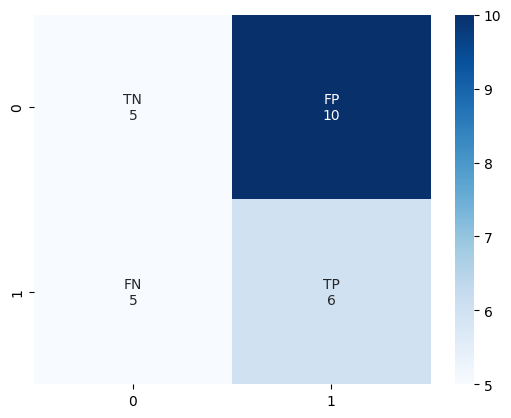

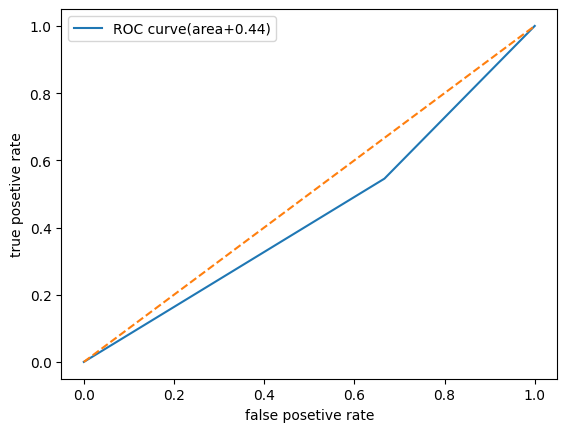

In [ ]:
array_ph_s_mode[np.isnan(array_ph_s_mode)] = 0
f_scores=perfomance(array_ph_s_mode[:,:,75])

Text(0.5, 1.0, ' sort with mod and pref phase')

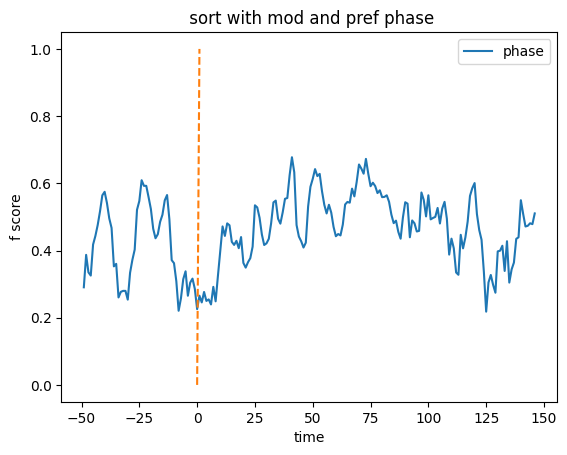

In [ ]:
#mode
win=array_ph_s_mode.shape[2];
f_scores=np.zeros([win])
f_scores_ph=np.zeros([win])
f_scores_ph_cvar=np.zeros([win])
array_ph_s_mode[np.isnan(array_ph_s_mode)] = 0
m=0
for ti in range(np.shape(array_ph_s_mode)[2]):

  f_scores_ph[m]=perfomance(array_ph_s_mode[:,:,ti])
  m=m+1
window_size = 5
f_scores_ph_smooth = np.convolve(f_scores_ph, np.ones(window_size)/window_size, mode='valid')
t_h =np.linspace(1,200,200)
t_h=t_h-50
t_h_smooth = t_h[:len(f_scores_ph_smooth)]

plt.figure()
plt.plot(t_h[:len(f_scores_ph_smooth)],f_scores_ph_smooth,label='phase')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('time')
plt.ylabel('f score')
plt.legend()
plt.title(' sort with mod and pref phase')

In [ ]:
t_h

range(0, 200)

In [ ]:

f_scores=np.zeros([win.shape[1]])
f_scores_ph=np.zeros([win.shape[1]])
f_scores_ph_cvar=np.zeros([win.shape[1]])
array_ph_s_c[np.isnan(array_ph_s_c)] = 0
m=0
for ti in range(np.shape(win)[1]):
  t1 =win[0,ti]
  t2 = win[1,ti]
  mean_array=np.nanmean(array_s[:,:,int(t1):int(t2)+1],2)
  #phase_f_label=first_label(array_ph_s_mean[:,:,int(t1):int(t2)+1])
  a = np.arctan2(np.nanmean(np.sin(array_ph_s_c[:,0:-1,int(t1):int(t2)+1]), axis=1), np.nanmean(np.cos(array_ph_s_c[:,0:-1,int(t1):int(t2)+1]), axis=1))
  circular_mean = np.hstack((a,mean_array[:,-1].reshape(-1, 1)))
  f_scores[m]=perfomance(mean_array)
  f_scores_ph[m]=perfomance(circular_mean)
  m=m+1
window_size = 5
f_scores_smooth = np.convolve(f_scores, np.ones(window_size)/window_size, mode='valid')
f_scores_ph_smooth = np.convolve(f_scores_ph, np.ones(window_size)/window_size, mode='valid')
t_h_smooth = t_h[:len(f_scores_smooth)]

plt.figure()
plt.plot(t_h_smooth,f_scores_smooth,label='rate')
plt.plot(t_h_smooth,f_scores_ph_smooth,label='phase')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('time')
plt.ylabel('f score')
plt.legend()
plt.title(' sort with circ and pref phase')

Text(0.5, 1.0, 'multi unit with both')

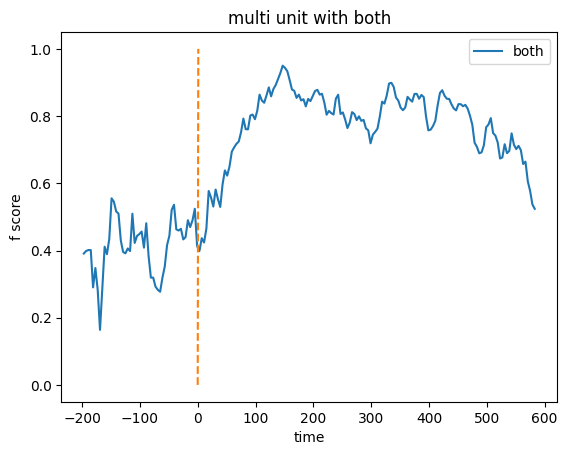

In [ ]:

f_scores=np.zeros([win.shape[1]])
f_scores_ph=np.zeros([win.shape[1]])
m=0
for ti in range(np.shape(win)[1]):
  t1 =win[0,ti]
  t2 = win[1,ti]
  mean_array=np.mean(array_s[:,:,int(t1):int(t2)+1],2)
  phase_f_label=first_label(array_ph_s_mean[:,:,int(t1):int(t2)+1])
  df=np.hstack([mean_array[:,:-1],phase_f_label[:,:]])
  f_scores[m]=perfomance(df)
  #f_scores[m]=perfomance(data_lda,df2.iloc[:,-1])

  m=m+1
window_size = 5
f_scores_smooth = np.convolve(f_scores, np.ones(window_size)/window_size, mode='valid')
t_h_smooth = t_h[:len(f_scores_smooth)]

plt.figure()
plt.plot(t_h_smooth,f_scores_smooth,label='both')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('time')
plt.ylabel('f score')
plt.legend()
plt.title('multi unit with both')

Text(0.5, 1.0, 'multi unit with mean phase label ')

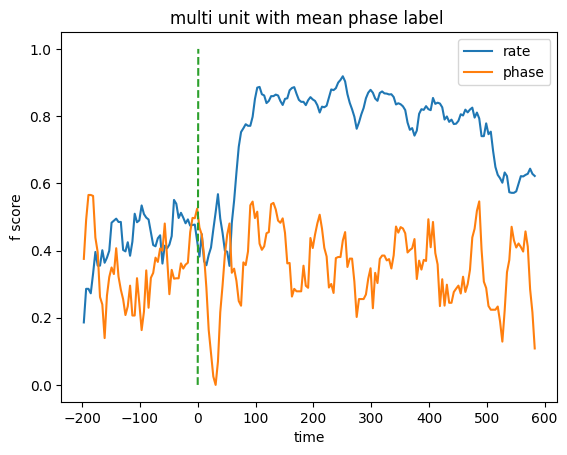

In [ ]:

f_scores=np.zeros([win.shape[1]])
f_scores_ph=np.zeros([win.shape[1]])
m=0
for ti in range(np.shape(win)[1]):
  t1 =win[0,ti]
  t2 = win[1,ti]
  mean_array=np.mean(array_s[:,:,int(t1):int(t2)+1],2)
  phase_f_label=first_label(array_ph_s_mean[:,:,int(t1):int(t2)+1])

  f_scores[m]=perfomance(mean_array)
  f_scores_ph[m]=perfomance(phase_f_label)
  m=m+1
window_size = 5
f_scores_smooth = np.convolve(f_scores, np.ones(window_size)/window_size, mode='valid')
f_scores_ph_smooth = np.convolve(f_scores_ph, np.ones(window_size)/window_size, mode='valid')
t_h_smooth = t_h[:len(f_scores_smooth)]

plt.figure()
plt.plot(t_h_smooth,f_scores_smooth,label='rate')
plt.plot(t_h_smooth,f_scores_ph_smooth,label='phase')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('time')
plt.ylabel('f score')
plt.legend()
plt.title('multi unit with mean phase label ')

Text(0.5, 1.0, 'sorted with first phase mode 4label')

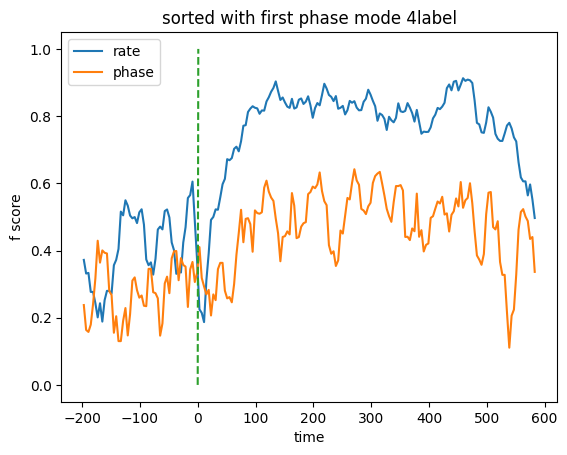

In [ ]:
#sorted
f_scores=np.zeros([win.shape[1]])
f_scores_ph=np.zeros([win.shape[1]])
m=0
array_ph_s_mode[np.isnan(array_ph_s_mode)] = 0
for ti in range(np.shape(win)[1]):
  t1 =win[0,ti]
  t2 = win[1,ti]
  mean_array=np.mean(array_s[:,:,int(t1):int(t2)+1],2)
  phase_f_label=first_label(array_ph_s_mode[:,:,int(t1):int(t2)+1])

  f_scores[m]=perfomance(mean_array)
  f_scores_ph[m]=perfomance(phase_f_label)
  m=m+1
window_size = 5
f_scores_smooth = np.convolve(f_scores, np.ones(window_size)/window_size, mode='valid')
f_scores_ph_smooth = np.convolve(f_scores_ph, np.ones(window_size)/window_size, mode='valid')
t_h_smooth = t_h[:len(f_scores_smooth)]

plt.figure()
plt.plot(t_h_smooth,f_scores_smooth,label='rate')
plt.plot(t_h_smooth,f_scores_ph_smooth,label='phase')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('time')
plt.ylabel('f score')
plt.legend()
plt.title('sorted with first phase mode 4label')

<ipython-input-61-c3ae1bf48460>:12: RuntimeWarning: Mean of empty slice
  circular_mean[:,0:-1] =np.angle(np.nanmean(np.exp(1j * array_ph_s_c[:,0:-1,int(t1):int(t2)+1]),axis=2),deg=True)
<ipython-input-61-c3ae1bf48460>:12: RuntimeWarning: Mean of empty slice
  circular_mean[:,0:-1] =np.angle(np.nanmean(np.exp(1j * array_ph_s_c[:,0:-1,int(t1):int(t2)+1]),axis=2),deg=True)
<ipython-input-61-c3ae1bf48460>:12: RuntimeWarning: Mean of empty slice
  circular_mean[:,0:-1] =np.angle(np.nanmean(np.exp(1j * array_ph_s_c[:,0:-1,int(t1):int(t2)+1]),axis=2),deg=True)
<ipython-input-61-c3ae1bf48460>:12: RuntimeWarning: Mean of empty slice
  circular_mean[:,0:-1] =np.angle(np.nanmean(np.exp(1j * array_ph_s_c[:,0:-1,int(t1):int(t2)+1]),axis=2),deg=True)
<ipython-input-61-c3ae1bf48460>:12: RuntimeWarning: Mean of empty slice
  circular_mean[:,0:-1] =np.angle(np.nanmean(np.exp(1j * array_ph_s_c[:,0:-1,int(t1):int(t2)+1]),axis=2),deg=True)
<ipython-input-61-c3ae1bf48460>:12: RuntimeWarning: Mean of empty

Text(0.5, 1.0, 'sorted with circular mean')

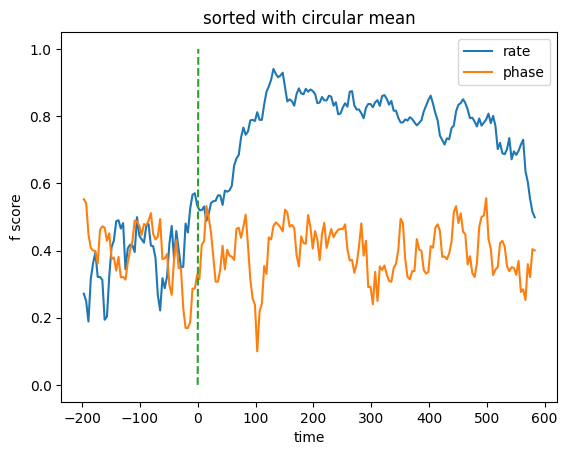

In [ ]:
f_scores=np.zeros([win.shape[1]])
f_scores_ph=np.zeros([win.shape[1]])
f_scores_ph_cvar=np.zeros([win.shape[1]])
m=0
for ti in range(np.shape(win)[1]):
  t1 =win[0,ti]
  t2 = win[1,ti]
  mean_array=np.mean(array_s[:,:,int(t1):int(t2)+1],2)
  circular_mean=np.squeeze(array_ph_s_c[:,:,0])
  #subarray=array_ph_s.copy()
  #subarray[subarray == 0] = np.nan
  circular_mean[:,0:-1] =np.angle(np.nanmean(np.exp(1j * array_ph_s_c[:,0:-1,int(t1):int(t2)+1]),axis=2),deg=True)

  f_scores[m]=perfomance(mean_array)
  f_scores_ph[m]=perfomance(circular_mean)
  m=m+1
window_size = 5
f_scores_smooth = np.convolve(f_scores, np.ones(window_size)/window_size, mode='valid')
f_scores_ph_smooth = np.convolve(f_scores_ph, np.ones(window_size)/window_size, mode='valid')
t_h_smooth = t_h[:len(f_scores_smooth)]

plt.figure()
plt.plot(t_h_smooth,f_scores_smooth,label='rate')
plt.plot(t_h_smooth,f_scores_ph_smooth,label='phase')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('time')
plt.ylabel('f score')
plt.legend()
plt.title('sorted with circular mean')